In [ ]:
import pandas as pd
import os

In [ ]:
os.getcwd()

In [ ]:
movies = pd.read_csv('C:\\Users\\beefm\\Jupyter\\Homework Sections\\Movie-Ratings.csv')

In [ ]:
len(movies)

In [ ]:
movies.head()

In [ ]:
movies.columns

In [ ]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [ ]:
movies.head()

In [ ]:
movies.info()

In [ ]:
movies.describe()

In [ ]:
###Year needs to be a categorical value, not a numeric

In [ ]:
movies.Film = movies.Film.astype('category')

In [ ]:
movies.head()

In [ ]:
movies.info()

In [ ]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [ ]:
movies.info()

In [ ]:
movies.Genre.cat.categories

In [ ]:
movies.describe()

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
#Jointplots

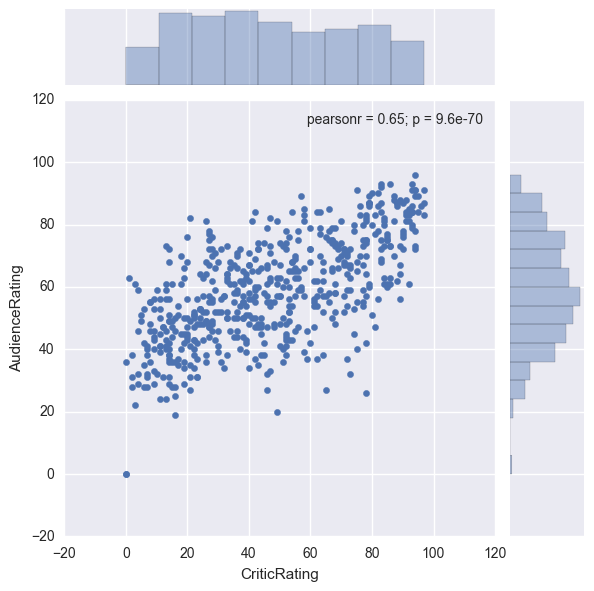

In [28]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

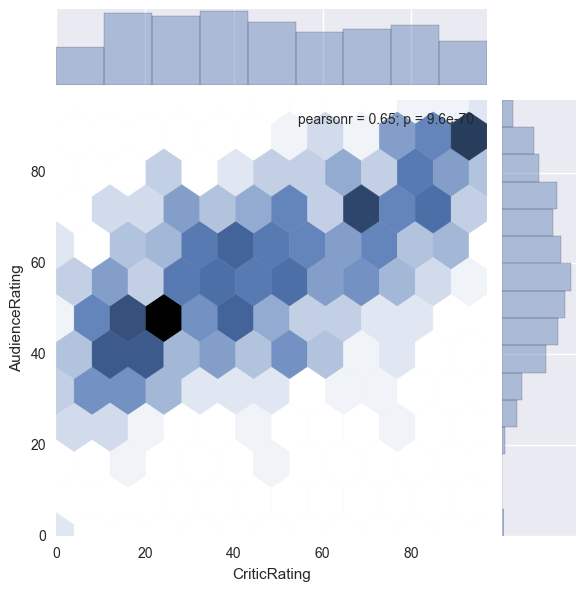

In [29]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

In [30]:
#Chart 1

In [31]:
####Histograms

TypeError: slice indices must be integers or None or have an __index__ method

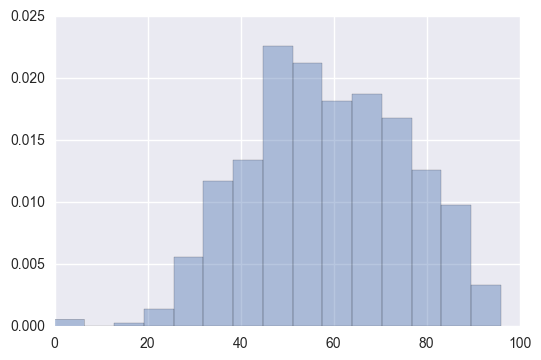

In [32]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

TypeError: slice indices must be integers or None or have an __index__ method

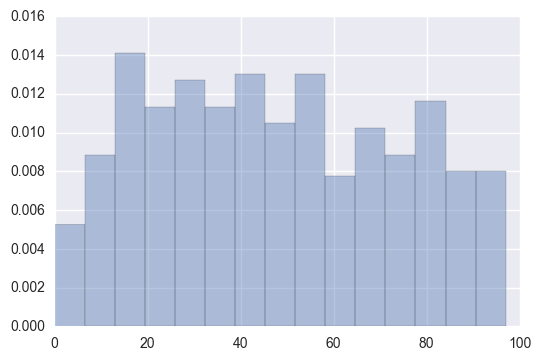

In [33]:
m2 = sns.distplot(movies.CriticRating, bins=15)

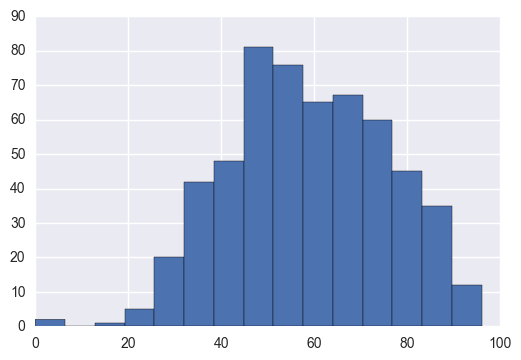

In [34]:
# Chart 2 sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins=15)

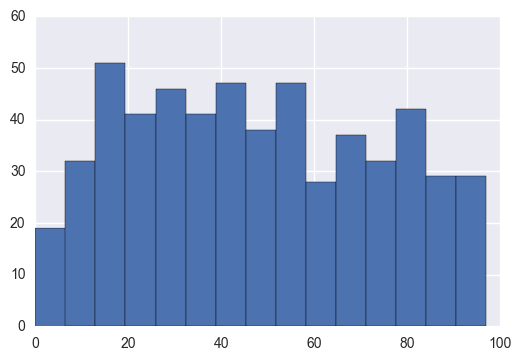

In [35]:
####Chart 3
sns.set_style("darkgrid")
n1 = plt.hist(movies.CriticRating, bins=15)

In [36]:
###Stacked Histograms (Hit tab to fill)

<function matplotlib.pyplot.show>

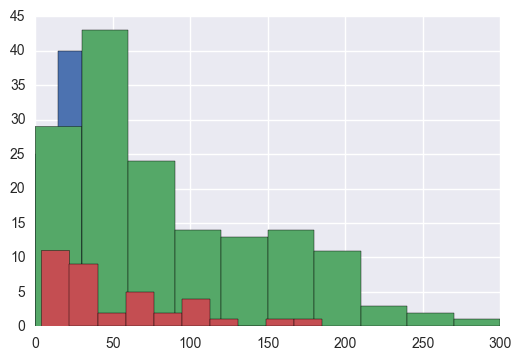

In [37]:
##Running a filter
# movies.Genre == 'Drama'
# movies[movies.Genre == 'Drama'].BudgetMillions
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show

<function matplotlib.pyplot.show>

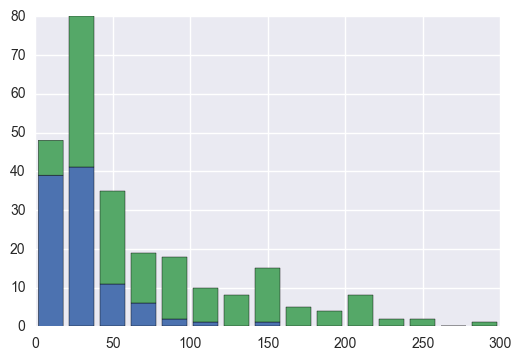

In [38]:
plt.hist([movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Action'].BudgetMillions], \
         bins =15, stacked=True)
plt.show


In [39]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


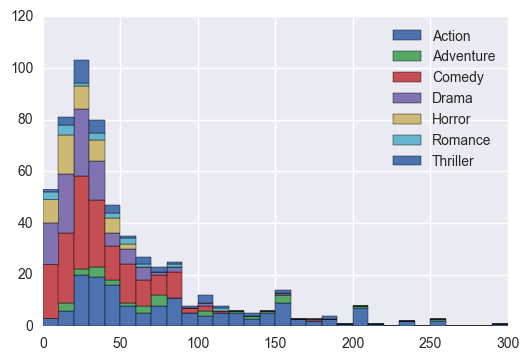

In [40]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

In [41]:
###Kernal Density Estimate Plot

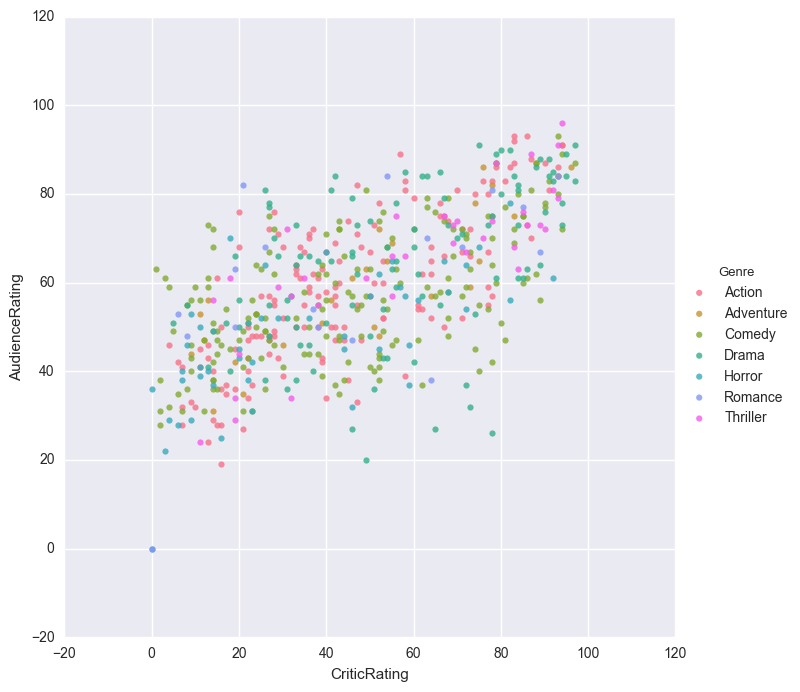

In [42]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                 fit_reg=False, hue='Genre', \
                 size=7, aspect=1)

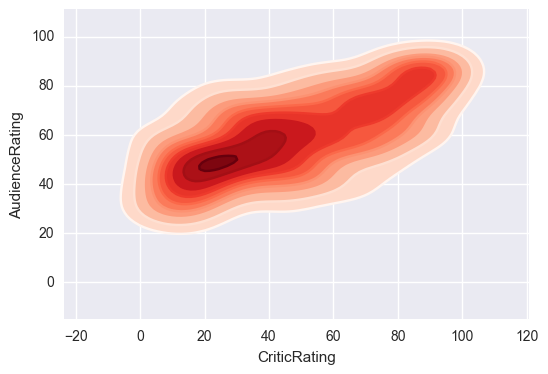

In [43]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False, cmap='Reds')

###TIPS
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds')

In [44]:
#Working with Subplots()
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

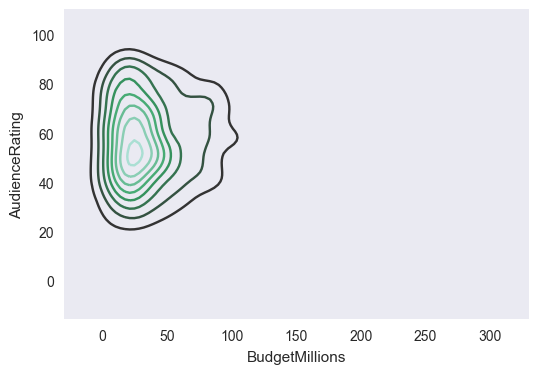

In [45]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

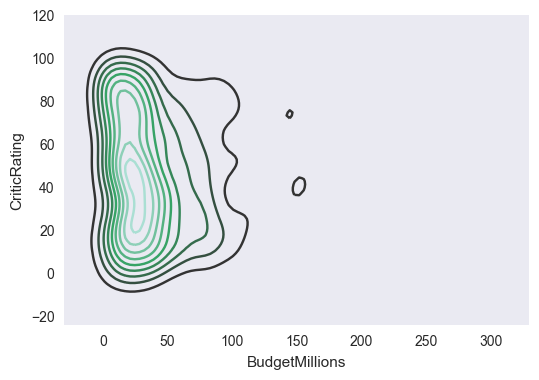

In [46]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

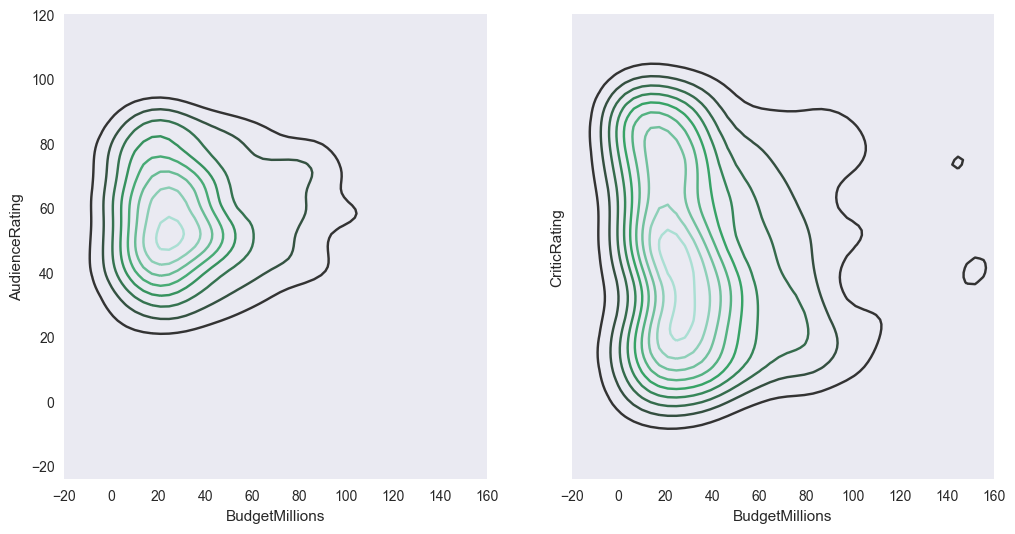

In [47]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

In [48]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223F65FC438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000223F5E0C0F0>], dtype=object)

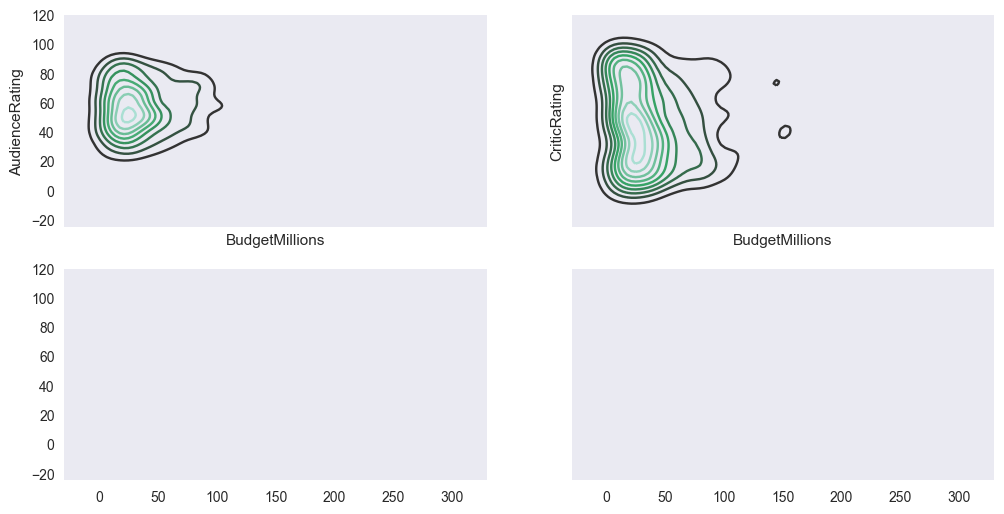

In [49]:
f, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])

In [50]:
##ViolinPlots

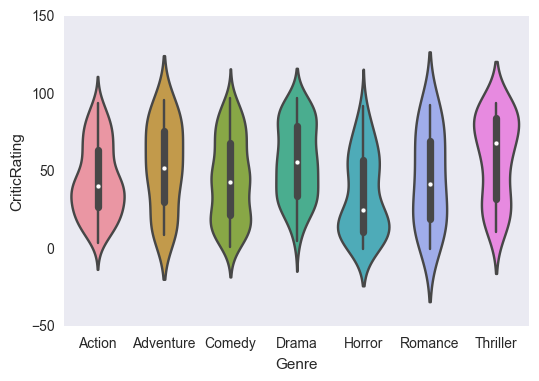

In [51]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

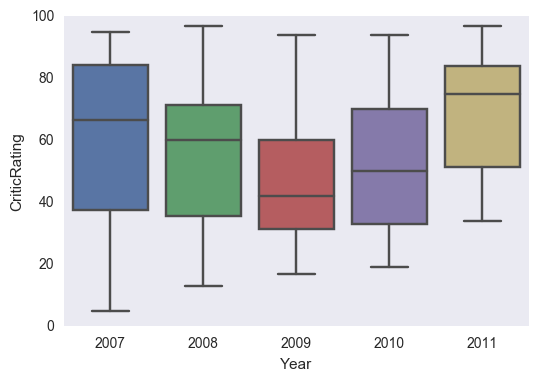

In [52]:
# w = sns.boxplot(data=movies, x='Genre', y='CriticRating')
w = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

In [53]:
###Creating a Facet Grid

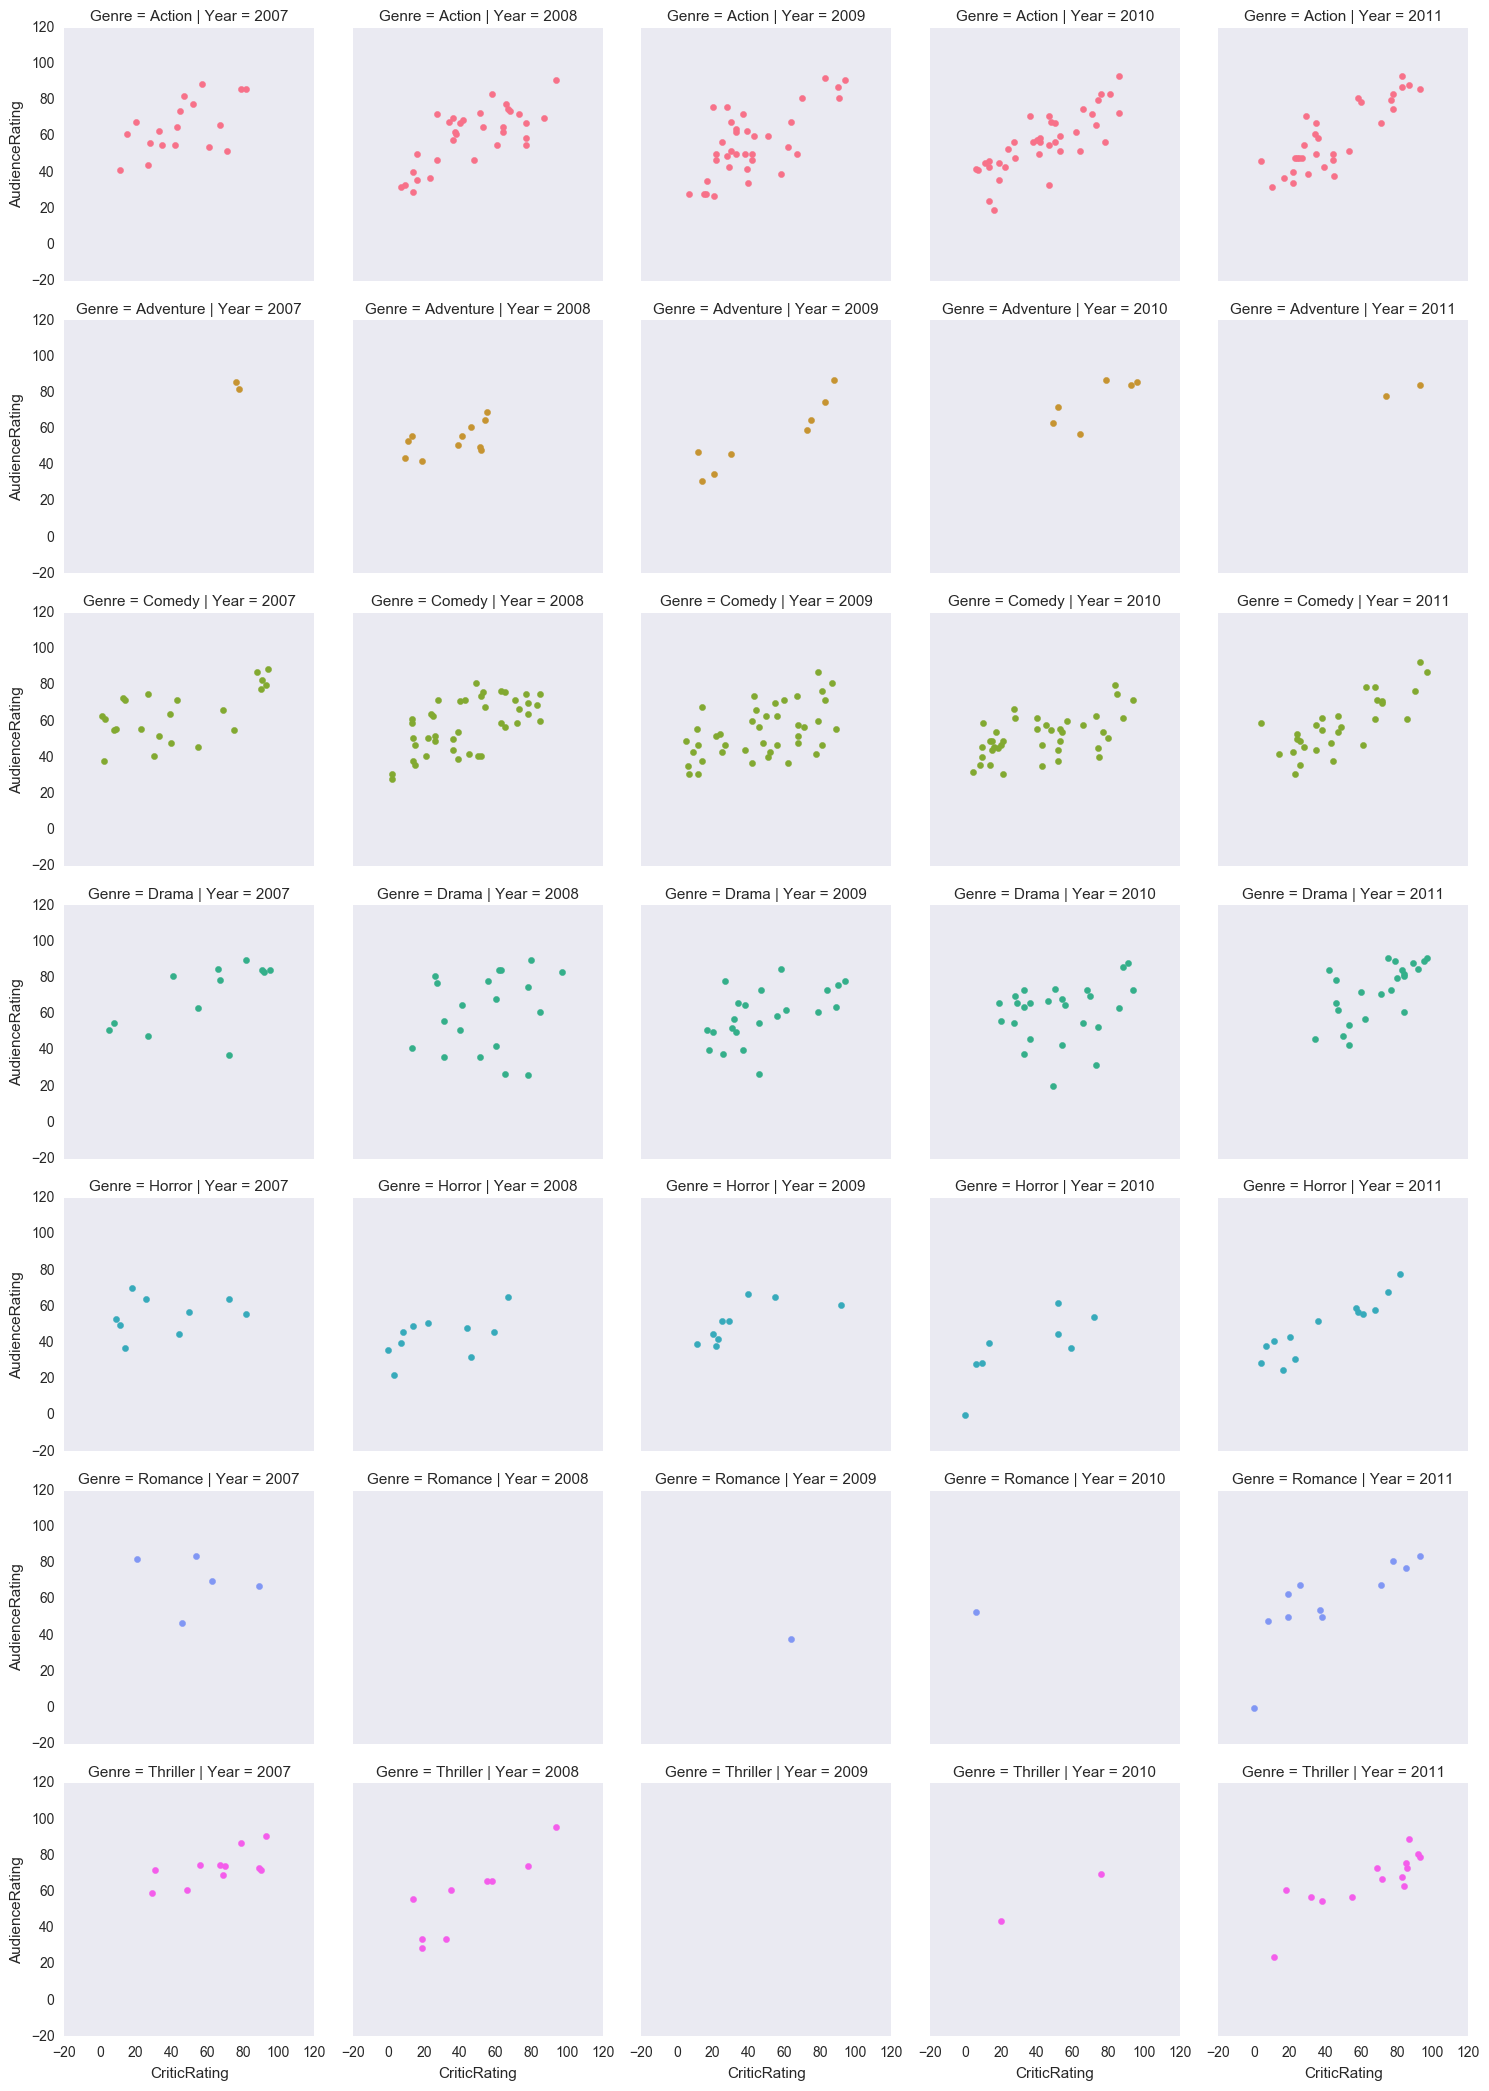

In [63]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

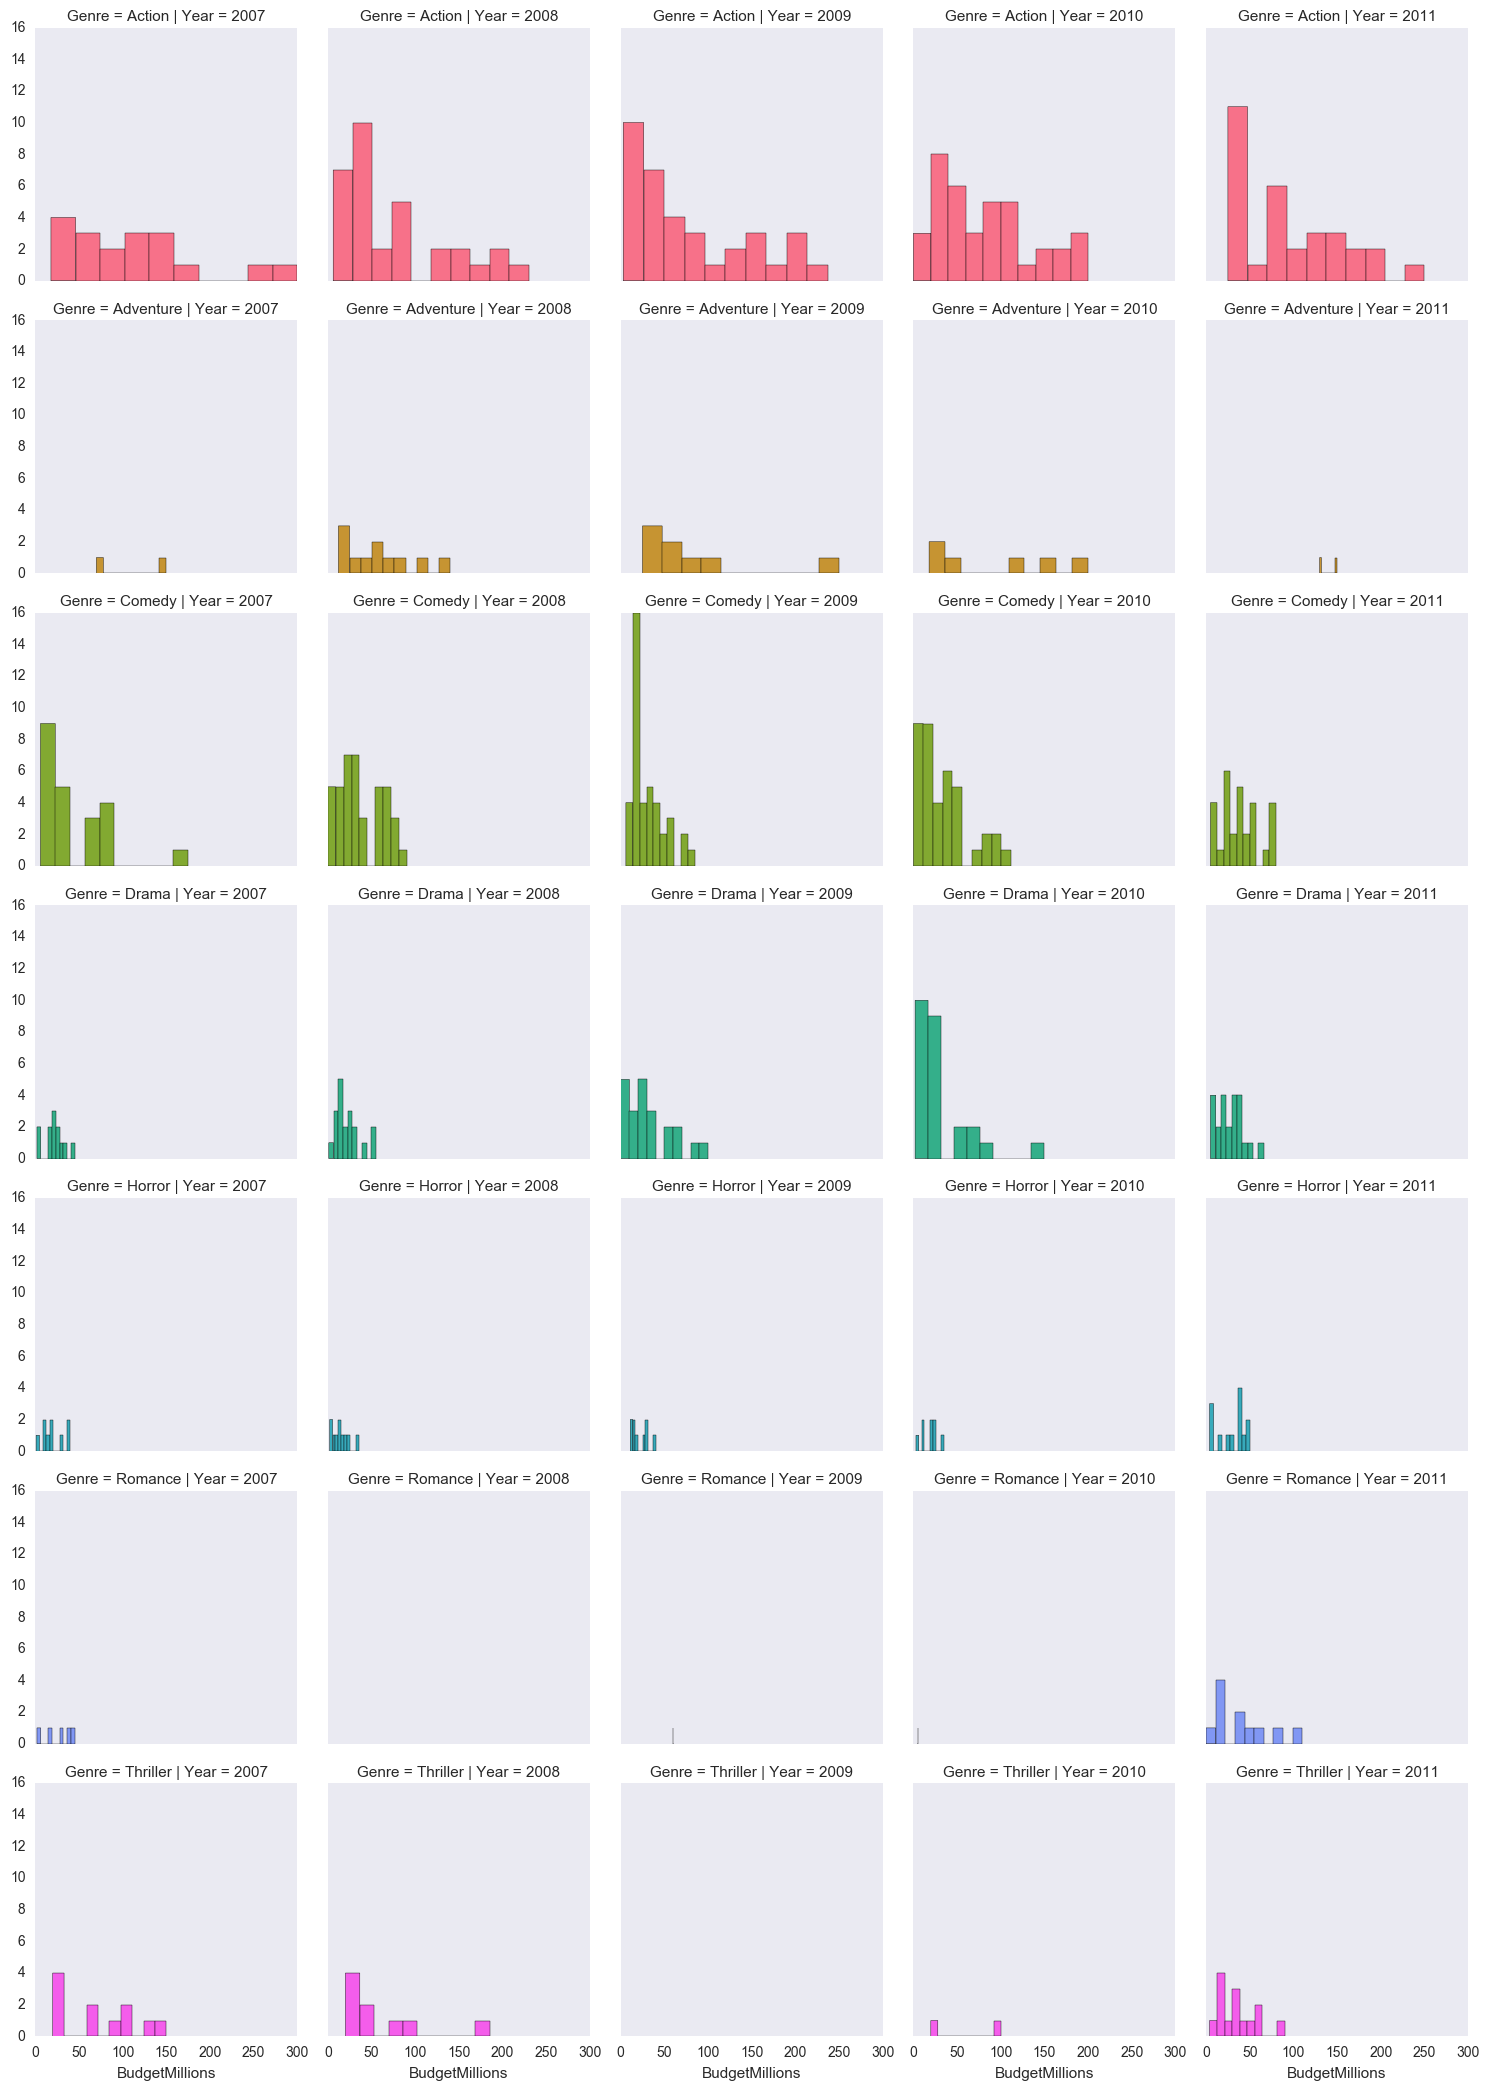

In [64]:
#can populate with any type of chart.
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

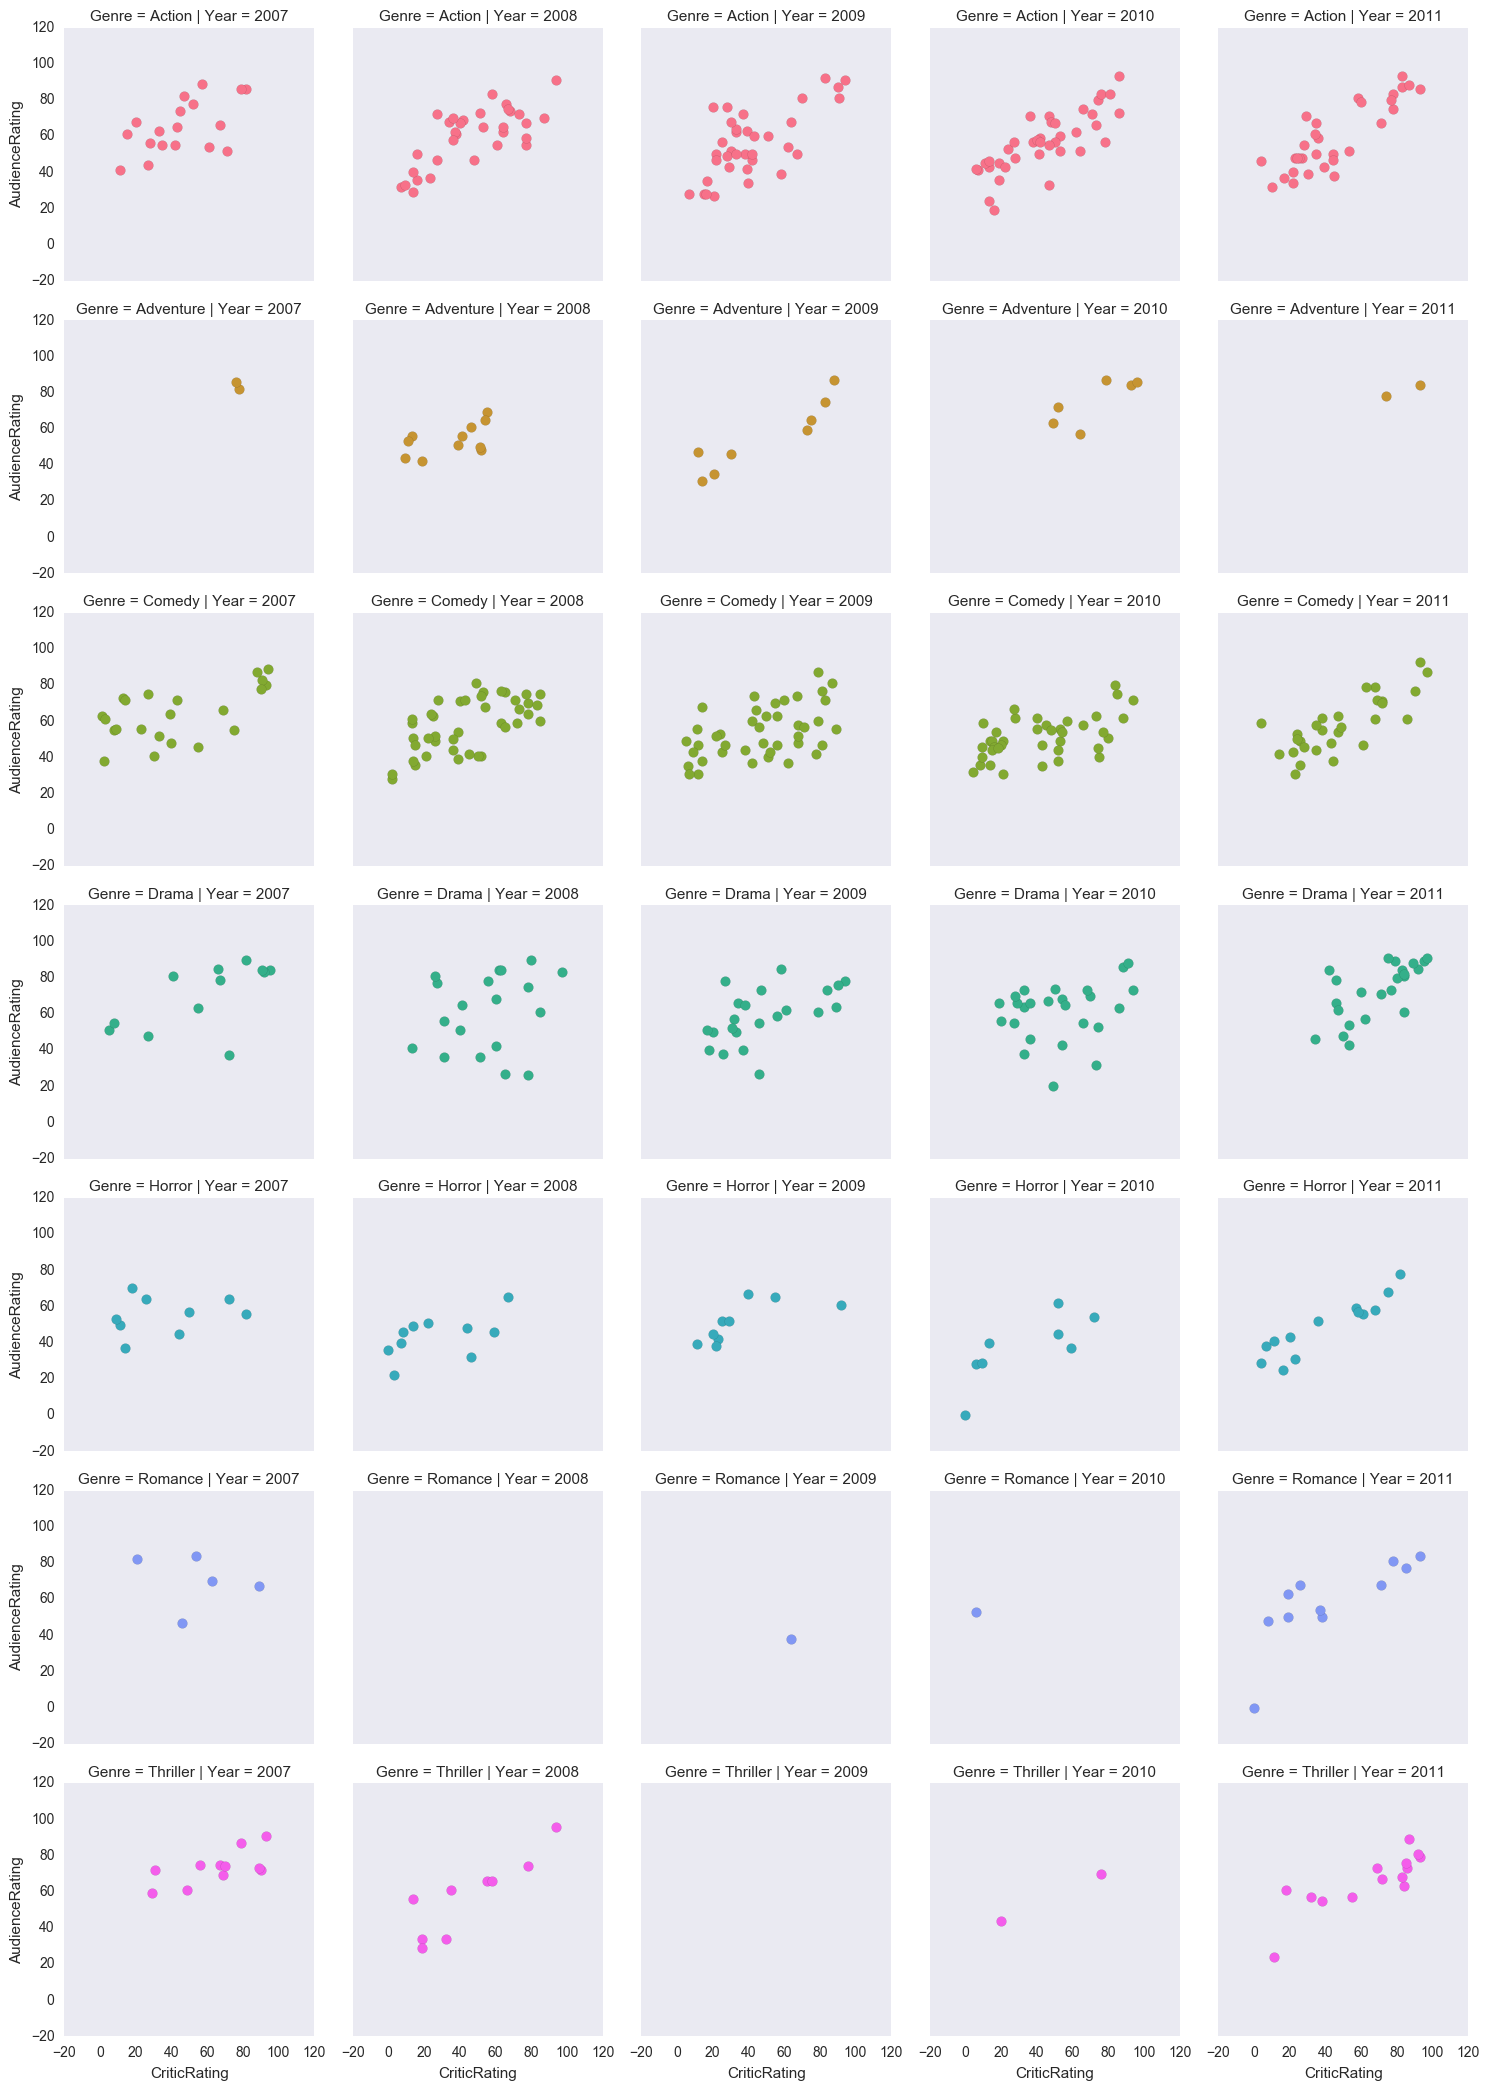

In [68]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=.05, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

In [67]:
kws

{'edgecolor': 'black', 'linewidth': 0.05, 's': 50}

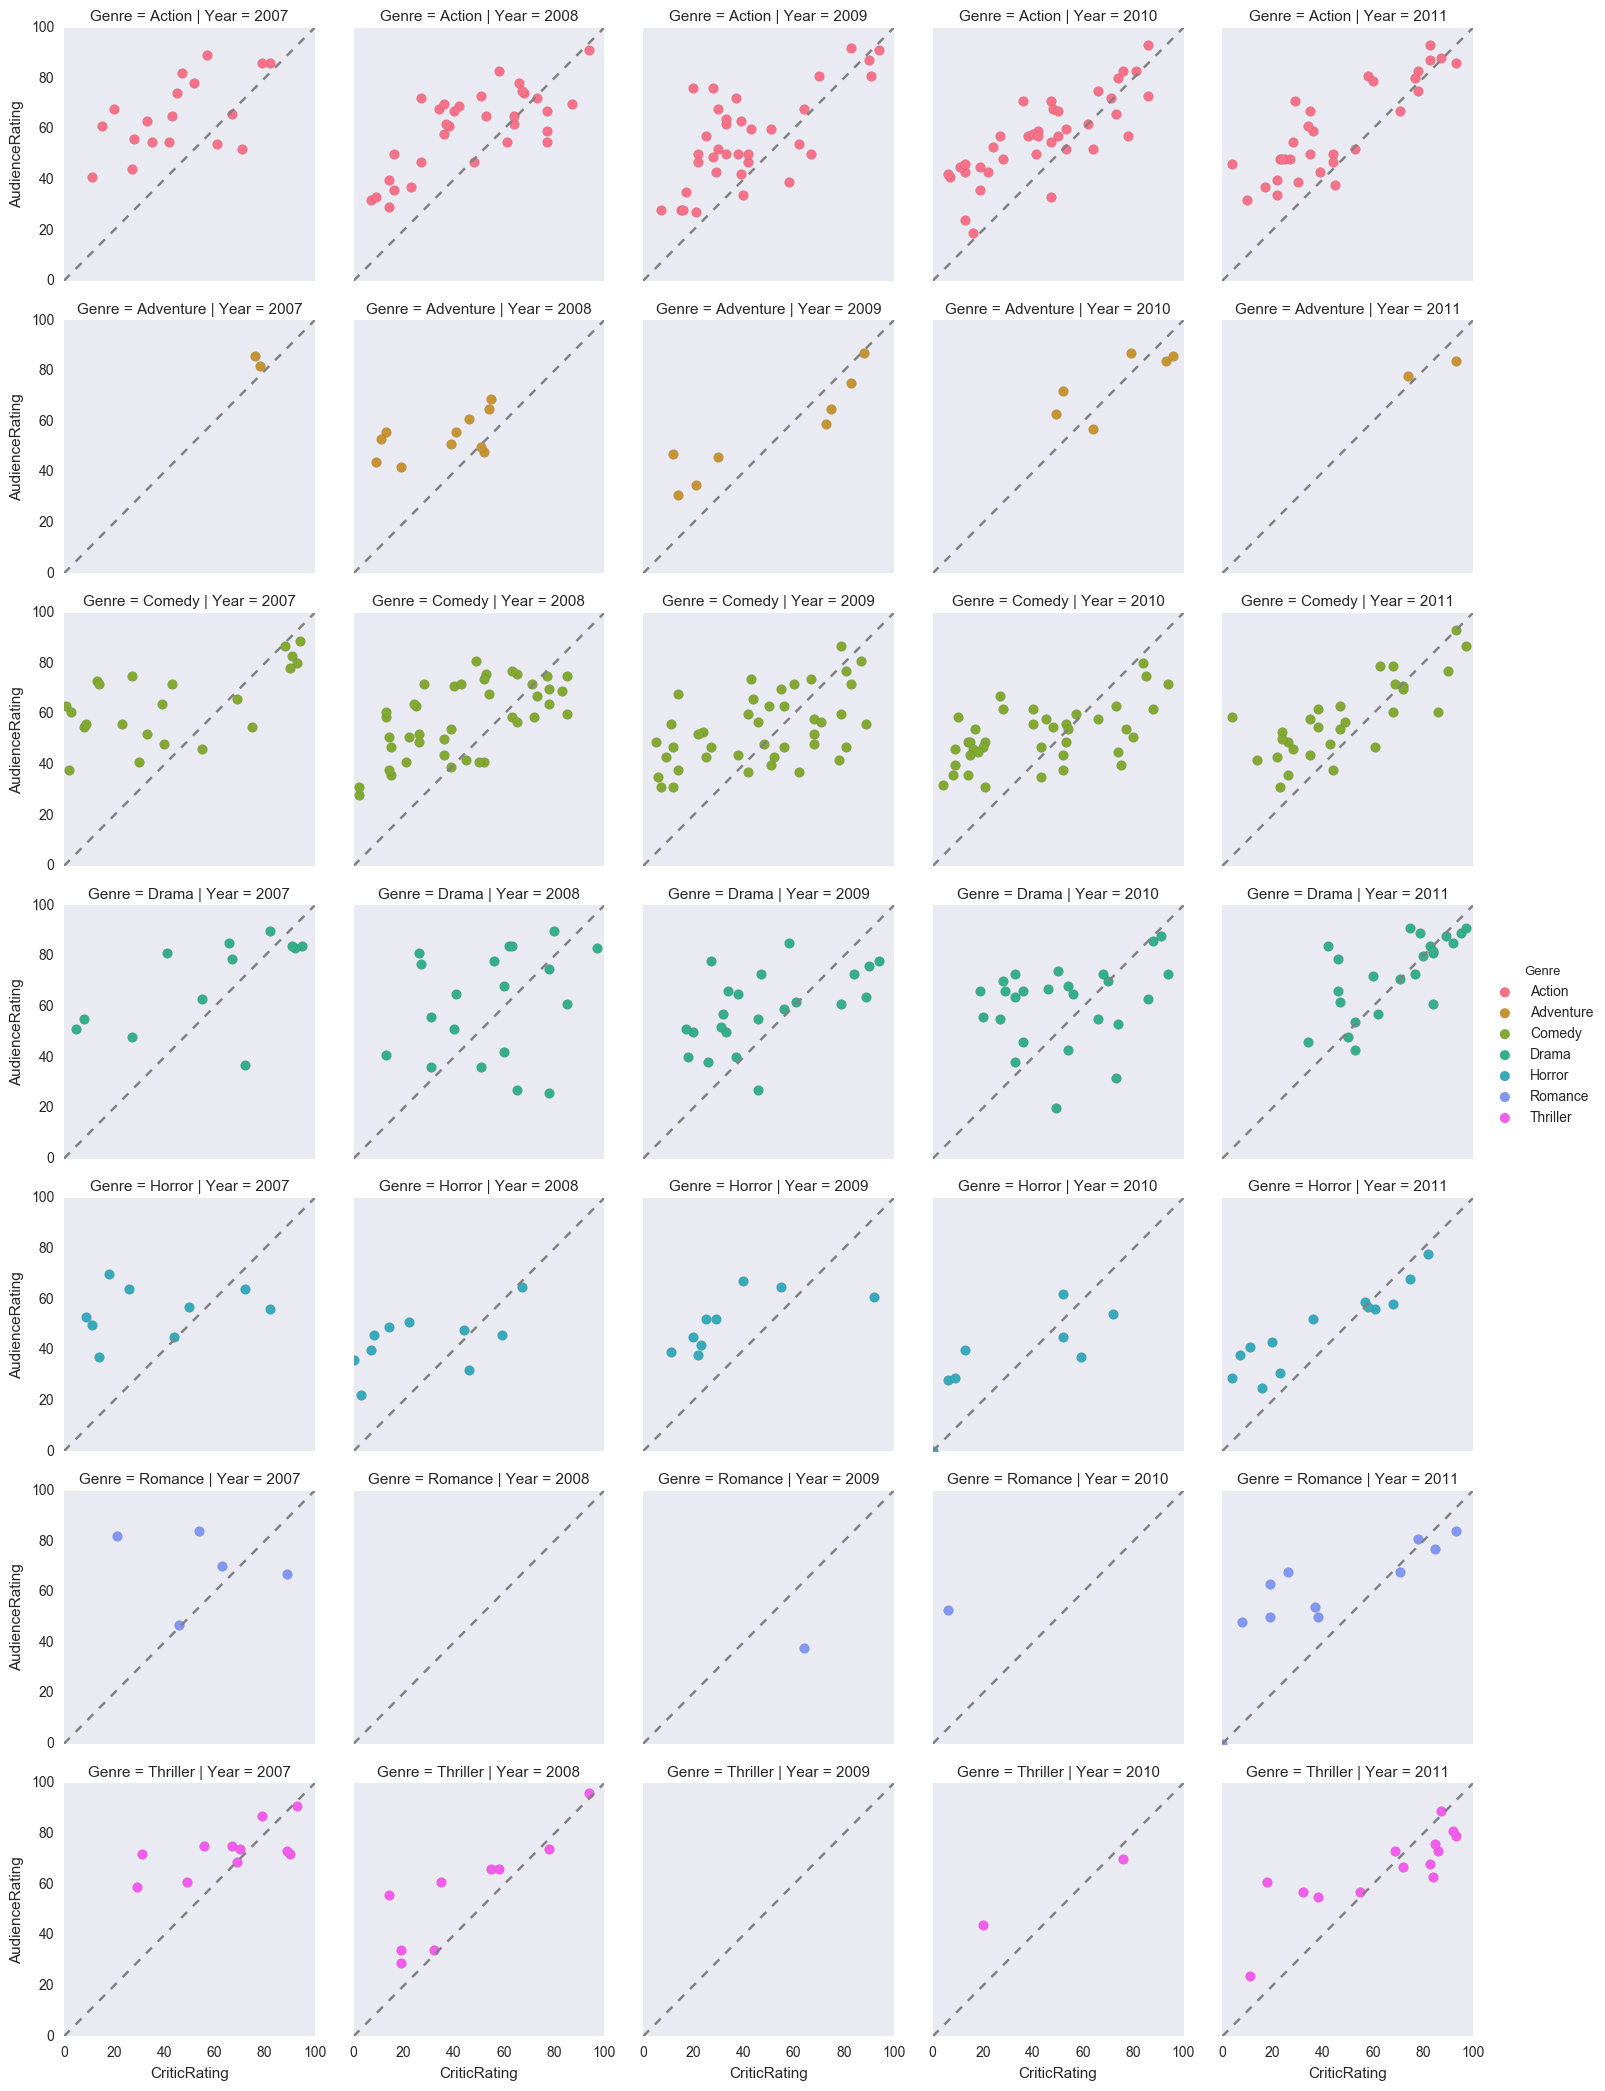

In [72]:
#Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=.05, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls="--")
g.add_legend()

In [73]:
##Build a dashboard

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.show>

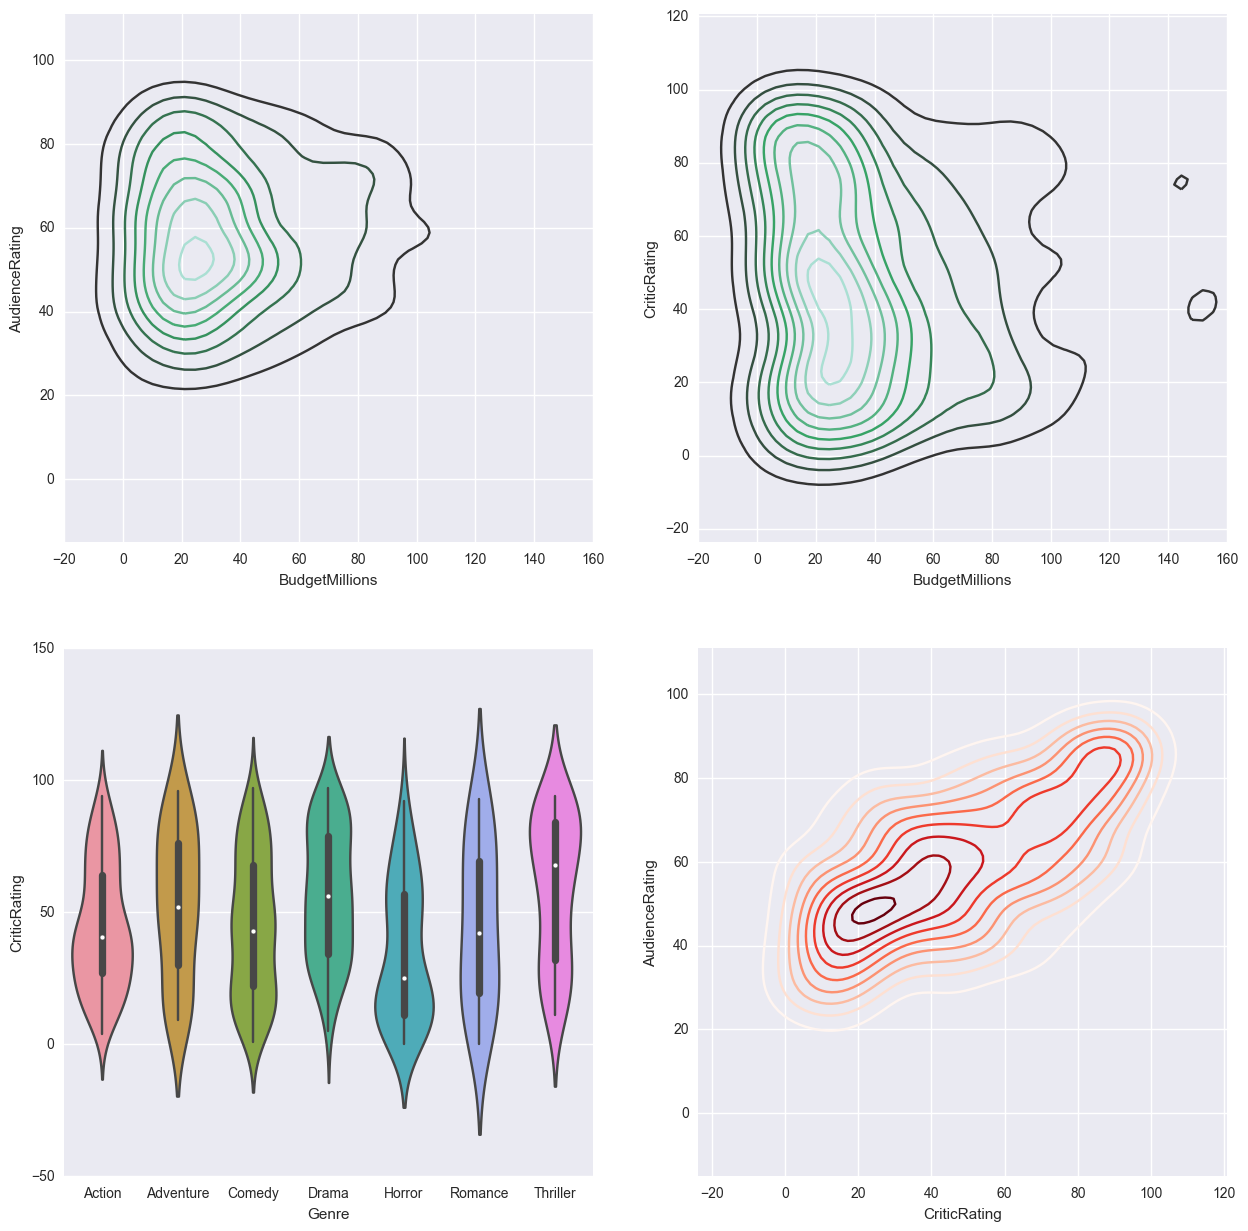

In [89]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
z = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1,0])
# axes[1,1.hist(movies.CriticRating, bins=15)
# k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
#                shade=True, shade_lowest=False, cmap='Reds')
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show